In [81]:
import numpy as np  # whole numpy lib is available, prepend 'np.'
from numpy import average, std
from numpy.random import random, randint, normal, shuffle,uniform
import scipy
from scipy.stats import ttest_ind
import seaborn as sns
import fnmatch
import os  # handy system and path functions
import sys  # to get file system encoding
import csv
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd  
import matplotlib
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
import mne
#import FOOOF
from mne.time_frequency import tfr_morlet

Python version 3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]
Pandas version 0.23.4
Matplotlib version 3.0.2


In [82]:
ROOT='/data/backed_up/shared/AlphaStudy_data/EEG_preprocessed/'
behav_file='/home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_behavior_data/spenser_Feb_14_1502.csv'

In [105]:
behav=pd.read_csv(behav_file)
#behav.groupby(['disCue_validity','highProbLoc?']).mean()
behav[behav.disCue_validity=='100%']

,block,tarCue_validity,disCue_validity,highProbLoc?,highProbLocation,likelyDisHemisphere,trialNum,disCue,disPresentOrAbsent,disVorI,distractor_loc,corrResp,subResp,trialCorr?,RT,"stim_loc(T,D)",ITI,triggers
100,2,None,100%,Yes,11,L,0,Absent,Absent,valid,None,up,up,1.0,0.837650,"('3', 'noDis')",4.3,NaN
101,2,None,100%,Yes,11,L,1,Present,Present,valid,high prob,left,left,1.0,0.557527,"('9', '11')",4.6,NaN
102,2,None,100%,Yes,11,L,2,Absent,Absent,valid,None,right,right,1.0,0.577724,"('9', 'noDis')",4.3,NaN
103,2,None,100%,Yes,11,L,3,Present,Present,valid,high prob,down,down,1.0,0.658480,"('9', '11')",3.4,NaN
104,2,None,100%,Yes,11,L,4,Absent,Absent,valid,None,up,up,1.0,1.097657,"('1', 'noDis')",3.6,NaN
105,2,None,100%,Yes,11,L,5,Present,Present,valid,high prob,down,down,1.0,0.797595,"('9', '11')",3.9,NaN
106,2,None,100%,Yes,11,L,6,Present,Present,valid,high prob,left,left,1.0,1.577557,"('5', '11')",4.4,NaN
107,2,None,100%,Yes,11,L,7,Absent,Absent,valid,None,right,right,1.0,0.937654,"('7', 'noDis')",3.4,NaN
108,2,None,100%,Yes,11,L,8,Present,Present,valid,high prob,up,up,1.0,0.897581,"('9', '11')",3.4,NaN
109,2,None,100%,Yes,11,L,9,Present,Present,valid,high prob,right,right,1.0,1.377580,"('5', '11')",3.7,NaN


In [96]:
behav[behav.likelyDisHemisphere=='R']

,block,tarCue_validity,disCue_validity,highProbLoc?,highProbLocation,likelyDisHemisphere,trialNum,disCue,disPresentOrAbsent,disVorI,distractor_loc,corrResp,subResp,trialCorr?,RT,"stim_loc(T,D)",ITI,triggers
50,1,None,50%,Yes,3,R,0,Absent,Absent,valid,None,right,right,1.0,1.237448,"('5', 'noDis')",3.6,NaN
51,1,None,50%,Yes,3,R,1,Absent,Present,invalid,high prob,left,left,1.0,1.657588,"('9', '3')",3.6,NaN
52,1,None,50%,Yes,3,R,2,Absent,Absent,valid,None,left,left,1.0,0.777617,"('11', 'noDis')",3.8,NaN
53,1,None,50%,Yes,3,R,3,Absent,Present,invalid,high prob,left,left,1.0,0.697627,"('1', '3')",3.7,NaN
54,1,None,50%,Yes,3,R,4,Present,Present,valid,high prob,right,right,1.0,1.057668,"('5', '3')",4.4,NaN
55,1,None,50%,Yes,3,R,5,Present,Present,valid,high prob,down,down,1.0,1.457418,"('7', '3')",4.3,NaN
56,1,None,50%,Yes,3,R,6,Present,Present,valid,high prob,up,up,1.0,0.897608,"('5', '3')",4.3,NaN
57,1,None,50%,Yes,3,R,7,Present,Absent,invalid,None,up,up,1.0,1.137634,"('7', 'noDis')",3.4,NaN
58,1,None,50%,Yes,3,R,8,Present,Absent,invalid,None,up,up,1.0,0.737625,"('5', 'noDis')",3.6,NaN
59,1,None,50%,Yes,3,R,9,Absent,Present,invalid,high prob,right,right,1.0,1.297539,"('11', '3')",4.2,NaN


In [86]:
len(nhp_behav)

50

## Cue

In [87]:
nla=mne.read_epochs(ROOT+'spenser/NLA-epo.fif') # no target, low distractor validity, absent cue
nha=mne.read_epochs(ROOT+'spenser/NHA-epo.fif')
nlp=mne.read_epochs(ROOT+'spenser/NLP-epo.fif')
nhp=mne.read_epochs(ROOT+'spenser/NHP-epo.fif') # no target, high dis cue validity, present

Reading /data/backed_up/shared/AlphaStudy_data/EEG_preprocessed/spenser/NLA-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    2500.00 ms
        0 CTF compensation matrices available
100 matching events found
Applying baseline correction (mode: mean)
100 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/EEG_preprocessed/spenser/NHA-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    2500.00 ms
        0 CTF compensation matrices available
50 matching events found
Applying baseline correction (mode: mean)
50 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/EEG_preprocessed/spenser/NLP-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    2500.00 ms
        0 CTF compensation matrices available
100 match

In [88]:
nhp

<EpochsFIF  |   50 events (all good), -0.5 - 2.5 sec, baseline [-0.5, 0], ~38.3 MB, data loaded,
 'NHP_trig': 50>

## Comparisons to make:

(Dis 100% validity/High prob loc/Present Cue) vs (Dis 100% validity/Low prob loc/present cue)

(Dis 100% validity/Present Cue) vs (100% validity/Absent cue)

(Dis 100%/Present Cue) vs (Dis 50%/Present Cue)

## (Dis 100% validity/High prob loc/Present Cue) vs (Dis 100% validity/Low prob loc/present cue)

In [85]:
nhp_behav=behav[behav.disCue_validity==behav.disCue_validity[299]][behav.disCue=='Present'].reset_index(drop=True)
nhp_behav

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,block,tarCue_validity,disCue_validity,highProbLoc?,highProbLocation,likelyDisHemisphere,trialNum,disCue,disPresentOrAbsent,disVorI,distractor_loc,corrResp,subResp,trialCorr?,RT,"stim_loc(T,D)",ITI,triggers
0,2,None,100%,Yes,11,L,1,Present,Present,valid,high prob,left,left,1.0,0.557527,"('9', '11')",4.6,NaN
1,2,None,100%,Yes,11,L,3,Present,Present,valid,high prob,down,down,1.0,0.658480,"('9', '11')",3.4,NaN
2,2,None,100%,Yes,11,L,5,Present,Present,valid,high prob,down,down,1.0,0.797595,"('9', '11')",3.9,NaN
3,2,None,100%,Yes,11,L,6,Present,Present,valid,high prob,left,left,1.0,1.577557,"('5', '11')",4.4,NaN
4,2,None,100%,Yes,11,L,8,Present,Present,valid,high prob,up,up,1.0,0.897581,"('9', '11')",3.4,NaN
5,2,None,100%,Yes,11,L,9,Present,Present,valid,high prob,right,right,1.0,1.377580,"('5', '11')",3.7,NaN
6,2,None,100%,Yes,11,L,12,Present,Present,valid,high prob,down,down,1.0,1.237615,"('9', '11')",4.6,NaN
7,2,None,100%,Yes,11,L,13,Present,Present,valid,high prob,left,left,1.0,0.877496,"('7', '11')",3.8,NaN
8,2,None,100%,Yes,11,L,14,Present,Present,valid,low prob,right,right,1.0,1.377551,"('7', '5')",4.4,NaN
9,2,None,100%,Yes,11,L,15,Present,Present,valid,low prob,down,down,1.0,0.877663,"('9', '5')",4.1,NaN


In [89]:
HHP=nhp[0:25]
HLP=nhp[25:50]

In [90]:
freqs = np.logspace(*np.log10([2, 35]), num=20)
n_cycles = freqs / 2.  # different number of cycle per frequency
power_HHP, itc = tfr_morlet(HHP, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_HLP, itc = tfr_morlet(HLP, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)


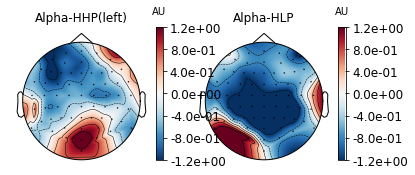

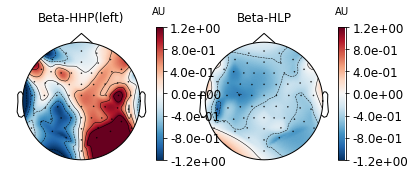

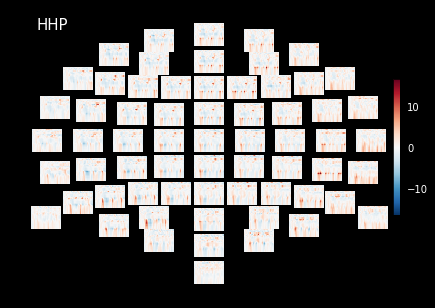

Applying baseline correction (mode: zscore)


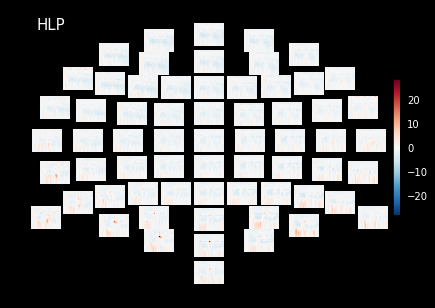

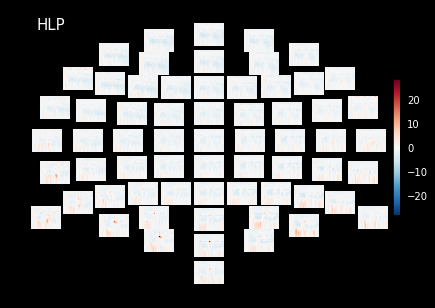

In [129]:
fig1, axis1 = plt.subplots(1, 2)
fig2,axis2=plt.subplots(1,2)
power_HHP.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14, vmin=-1.2, vmax=1.2,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[0],
                   title='Alpha-HHP(left)', show=False)
power_HLP.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.2, vmax=1.2,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[1],
                   title='Alpha-HLP', show=False)
power_HHP.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.2, vmax=1.2,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[0],
                   title='Beta-HHP(left)', show=False)
power_HLP.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.2, vmax=1.2,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[1],
                   title='Beta-HLP', show=False)
power_HHP.plot_topo(baseline=(-0.5,0), mode='zscore', title='HHP')
power_HLP.plot_topo(baseline=(-0.5,0), mode='zscore', title='HLP')

## (Dis 100% validity/Present Cue) vs (100% validity/Absent cue)

In [131]:
power_nha, itc = tfr_morlet(nha, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_nhp, itc = tfr_morlet(nhp, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_nhp_H, itc = tfr_morlet(nhp[0:25], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_nhp_L, itc = tfr_morlet(nhp[25:50], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [93]:
nha_behav=behav[behav.disCue_validity==behav.disCue_validity[271]][behav.disCue=='Absent'].reset_index(drop=True)
nhp_behav=behav[behav.disCue_validity==behav.disCue_validity[271]][behav.disCue=='Present'].reset_index(drop=True)

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [94]:
nhp_behav

,block,tarCue_validity,disCue_validity,highProbLoc?,highProbLocation,likelyDisHemisphere,trialNum,disCue,disPresentOrAbsent,disVorI,distractor_loc,corrResp,subResp,trialCorr?,RT,"stim_loc(T,D)",ITI,triggers
101,2,None,100%,Yes,11,L,1,Present,Present,valid,high prob,left,left,1.0,0.557527,"('9', '11')",4.6,NaN
103,2,None,100%,Yes,11,L,3,Present,Present,valid,high prob,down,down,1.0,0.658480,"('9', '11')",3.4,NaN
105,2,None,100%,Yes,11,L,5,Present,Present,valid,high prob,down,down,1.0,0.797595,"('9', '11')",3.9,NaN
106,2,None,100%,Yes,11,L,6,Present,Present,valid,high prob,left,left,1.0,1.577557,"('5', '11')",4.4,NaN
108,2,None,100%,Yes,11,L,8,Present,Present,valid,high prob,up,up,1.0,0.897581,"('9', '11')",3.4,NaN
109,2,None,100%,Yes,11,L,9,Present,Present,valid,high prob,right,right,1.0,1.377580,"('5', '11')",3.7,NaN
112,2,None,100%,Yes,11,L,12,Present,Present,valid,high prob,down,down,1.0,1.237615,"('9', '11')",4.6,NaN
113,2,None,100%,Yes,11,L,13,Present,Present,valid,high prob,left,left,1.0,0.877496,"('7', '11')",3.8,NaN
114,2,None,100%,Yes,11,L,14,Present,Present,valid,low prob,right,right,1.0,1.377551,"('7', '5')",4.4,NaN
115,2,None,100%,Yes,11,L,15,Present,Present,valid,low prob,down,down,1.0,0.877663,"('9', '5')",4.1,NaN


Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)


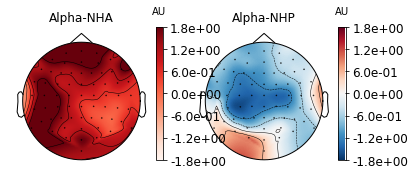

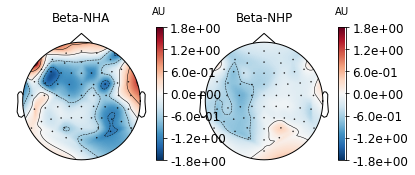

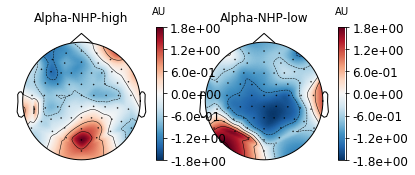

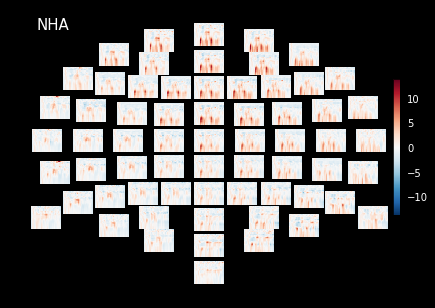

Applying baseline correction (mode: zscore)


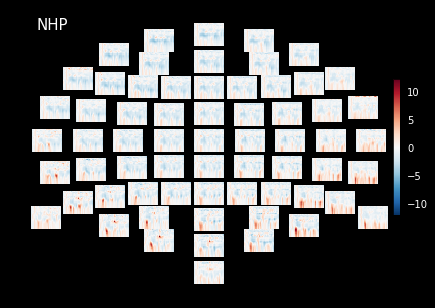

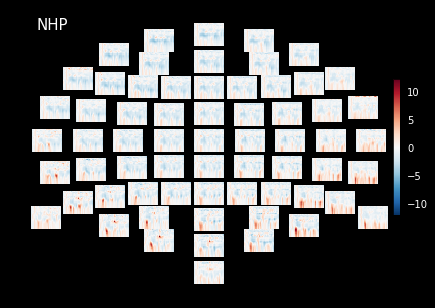

In [136]:
fig1, axis1 = plt.subplots(1, 2)
fig2,axis2=plt.subplots(1,2)
fig3,axis3=plt.subplots(1,2)
power_nha.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[0],
                   title='Alpha-NHA', show=False)
power_nhp.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[1],
                   title='Alpha-NHP', show=False)
power_nha.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[0],
                   title='Beta-NHA', show=False)
power_nhp.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[1],
                   title='Beta-NHP', show=False)
power_nhp_H.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis3[0],
                   title='Alpha-NHP-high', show=False)
power_nhp_L.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.8, vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis3[1],
                   title='Alpha-NHP-low', show=False)

power_nha.plot_topo(baseline=(-0.5,0), mode='zscore', title='NHA')
power_nhp.plot_topo(baseline=(-0.5,0), mode='zscore', title='NHP')

## (Dis 100%/Present Cue) vs (Dis 50%/Present Cue)

In [120]:
power_nhp, itc = tfr_morlet(nhp, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_nlp, itc = tfr_morlet(nlp, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_nlp_R, itc = tfr_morlet(nlp[0:25], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power_nlp_L, itc = tfr_morlet(nlp[25:50], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [127]:
nhp_behav=behav[behav.disCue_validity==behav.disCue_validity[271]][behav.disCue=='Present'].reset_index(drop=True)
nlp_behav=behav[behav.disCue_validity==behav.disCue_validity[0]][behav.disCue=='Present'].reset_index(drop=True)
#nlp_behav#[nlp_behav.likelyDisHemisphere=='randomized']

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)


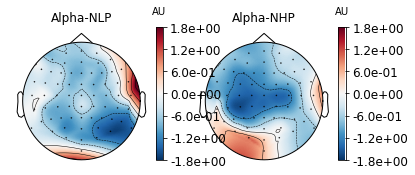

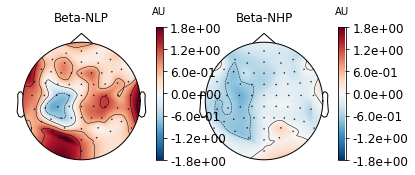

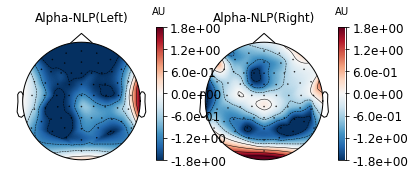

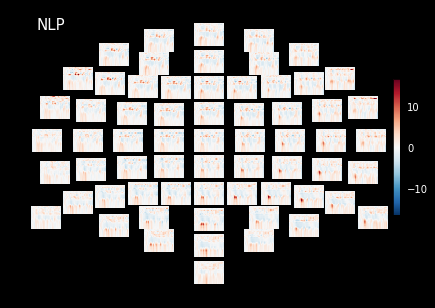

Applying baseline correction (mode: zscore)


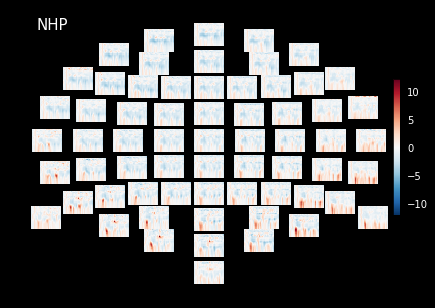

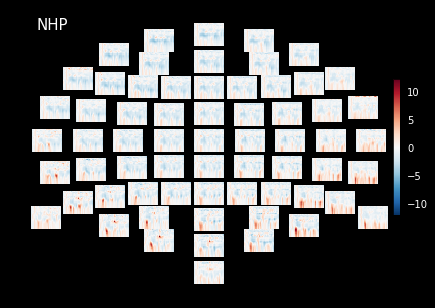

In [135]:
fig1, axis1 = plt.subplots(1, 2)
fig2,axis2=plt.subplots(1,2)
fig3,axis3=plt.subplots(1,2)
power_nlp.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.8,vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[0],
                   title='Alpha-NLP', show=False)
power_nlp_R.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.8,vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis3[1],
                   title='Alpha-NLP(Right)', show=False)
power_nlp_L.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.8,vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis3[0],
                   title='Alpha-NLP(Left)', show=False)
power_nhp.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=14,vmin=-1.8,vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis1[1],
                   title='Alpha-NHP', show=False)
power_nlp.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.8,vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[0],
                   title='Beta-NLP', show=False)
power_nhp.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=18, fmax=25,vmin=-1.8,vmax=1.8,
                   baseline=(-0.5, 0), mode='zscore', axes=axis2[1],
                   title='Beta-NHP', show=False)
power_nlp.plot_topo(baseline=(-0.5,0), mode='zscore', title='NLP')
power_nhp.plot_topo(baseline=(-0.5,0), mode='zscore', title='NHP')

## Probe

In [4]:
tarNdisIH=mne.read_epochs(ROOT+'spenser/tarNdisIH-epo.fif')
tarNdisIL=mne.read_epochs(ROOT+'spenser/tarNdisIL-epo.fif')
tarNdisVH=mne.read_epochs(ROOT+'spenser/tarNdisVH-epo.fif')
tarNdisVL=mne.read_epochs(ROOT+'spenser/tarNdisVL-epo.fif')

Reading /data/backed_up/shared/AlphaStudy_data/EEG_preprocessed/spenser/tarNdisIH-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    2000.00 ms
        0 CTF compensation matrices available
50 matching events found
Applying baseline correction (mode: mean)
50 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/EEG_preprocessed/spenser/tarNdisIL-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    2000.00 ms
        0 CTF compensation matrices available
53 matching events found
Applying baseline correction (mode: mean)
53 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/EEG_preprocessed/spenser/tarNdisVH-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    2000.00 ms
        0 CTF compensation matrices ava

# no target/low validity/absent cue

The plot_psd_topomap function uses the min and max absolute value of the data to determine color range. The normalization of the PSD uses the length of the signal (by default, but can also incorporate the sampling rate). The normalize argument divides ea band by the total power if True (but here is defaulting to false).

dB (defaults to true, as long as normalize=False) indicates the transformation of data points to decibels by 10*np.log10(data). Performed after freqeuncies are aggregated either by np.sum or np.mean (agg_fun argument) 

Other args: bandwidth is the Hz of the multitaper windowing func (defaults to 4Hz);
            low_bias enforces the use of only tapers w more than 90% spectral concentrations within bandwitdh (default, True); adaptive (default False) uses adaptive weights to combine the tapered spectra into PSDs

    Using multitaper spectrum estimation with 7 DPSS windows


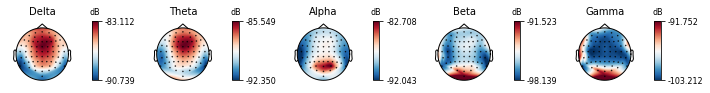

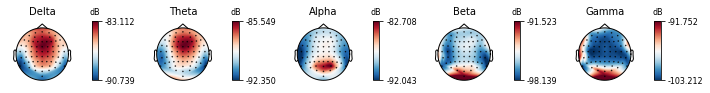

In [134]:
nhp.plot_psd_topomap(ch_type='eeg')
#(bands=None, vmin=None, vmax=None, tmin=None, tmax=None, proj=False, 
#bandwidth=None, adaptive=False, low_bias=True, normalization='length', 
#ch_type=None, layout=None, cmap='RdBu_r', agg_fun=None, dB=True, n_jobs=1, 
#normalize=False, cbar_fmt='%0.3f', outlines='head', axes=None, show=True, 
#verbose=None)


tfr_morlet: 

use_fft defaults to False, determines whether or not to use the fft based convolution; 
decim (defaults to 1) refers to the decimation factor after tf decomp; 
zero_mean, making sure wavelet mean ==0 (defaults to True); 
average (def to True), averages across epochs; 
can output power or "complex" (no averaging across epochs); 
ITC= inter-trial coherence

In [38]:
freqs = np.logspace(*np.log10([2, 35]), num=10)
n_cycles = freqs / 2.  # different number of cycle per frequency
power_nla, itc = tfr_morlet(nla, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

In [39]:
freqs

array([ 2.        ,  2.74881388,  3.77798886,  5.1924941 ,  7.13659992,
        9.80859244, 13.4809975 , 18.52837649, 25.46552919, 35.        ])

In [40]:
power_nla

<AverageTFR  |  time : [-0.500000, 2.500000], freq : [2.000000, 35.000000], nave : 100, channels : 64, ~2.7 MB>

averageTFR.plot:

"mode" arg is how baseline correction is applied, can be 'mean,' 'ratio' (divides by the mean of baseline rather than subtracting), 'logratio' (dividing by mean of baseline and logging that), etc.

dB (default true) applies 20*log10 to the data for final scale

yscale (defaults to 'auto') can set yaxis to log or linear, auto detects if the freqs are logged and plots the y axis as such


Applying baseline correction (mode: zscore)


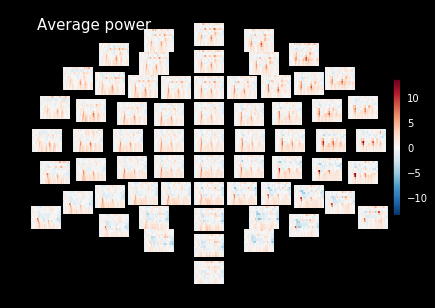

Applying baseline correction (mode: mean)


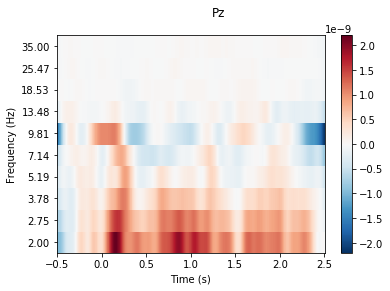

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


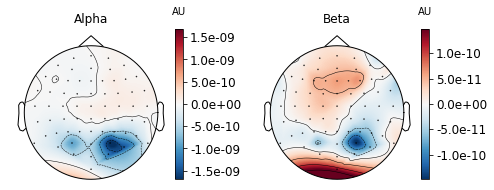

In [55]:
power_nla.plot_topo(baseline=(-0.5,0), mode='zscore', title='Average power')
power_nla.plot([30], baseline=(-0.5,0), mode='mean', title=power.ch_names[30])

fig, axis = plt.subplots(1, 2, figsize=(7, 4))
power_nla.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=12,
                   baseline=(-0.5, 0), mode='mean', axes=axis[0],
                   title='Alpha', show=False)
power_nla.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=13, fmax=25,
                   baseline=(-0.5, 0), mode='mean', axes=axis[1],
                   title='Beta', show=False)
mne.viz.tight_layout()
plt.show()

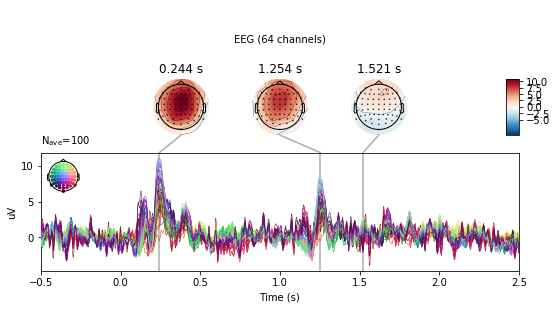

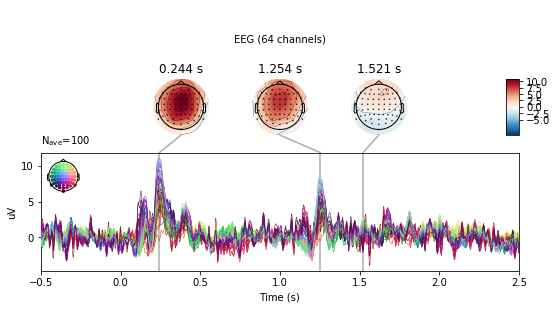

In [30]:
nla.average().plot_joint()

# No target/high validity/absent cue

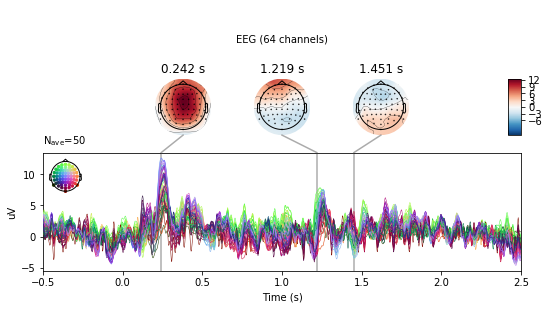

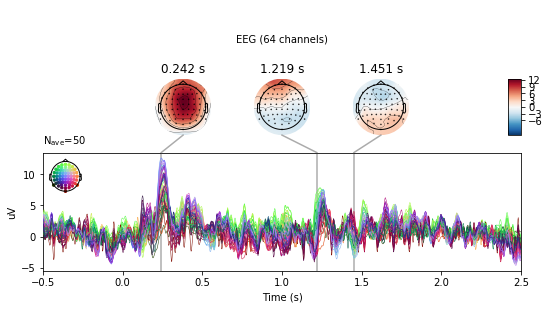

In [20]:
nha.average().plot_joint()

# No target/high cue validity/present cue

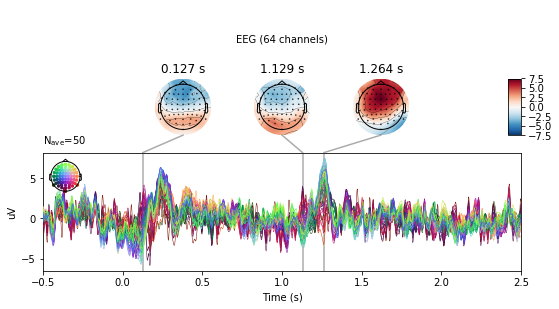

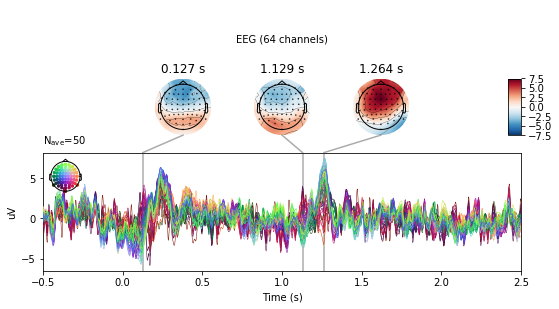

In [32]:
nhp.average().plot_joint()

# No target/low validity/present cue

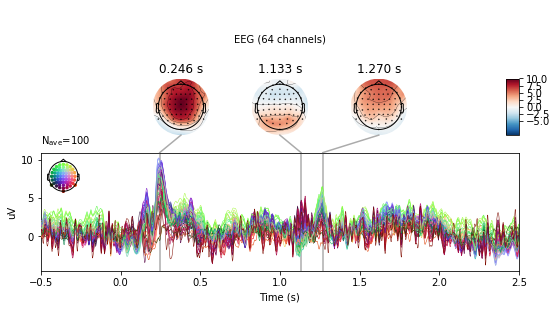

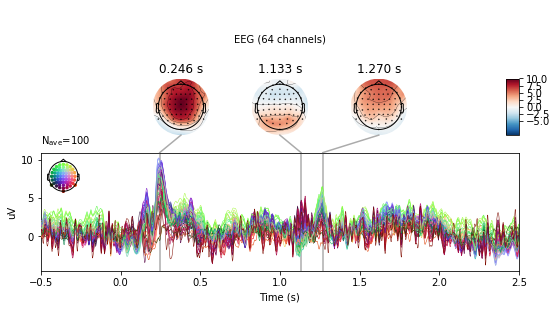

In [34]:
nlp.average().plot_joint()

In [37]:
power_nhp, itc = tfr_morlet(nhp, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


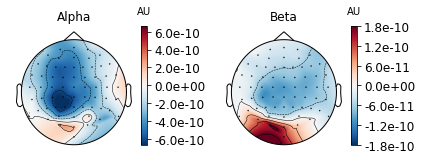

In [51]:
fig,axis=plt.subplots(1,2)
power_nhp.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=12,
                   baseline=(-0.5, 0), mode='mean', axes=axis[0],
                   title='Alpha', show=False)
power_nhp.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=13, fmax=25,
                   baseline=(-0.5, 0), mode='mean', axes=axis[1],
                   title='Beta', show=False)
mne.viz.tight_layout()
plt.show()